<a href="https://colab.research.google.com/github/aadarsh73/MachineLearning/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression


In [4]:
data = pd.read_csv('/content/diabetes.csv')

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.shape

(768, 9)

In [7]:
data.drop_duplicates()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
columns = data.columns.tolist()

In [9]:
columns.remove('Outcome')

In [10]:
target="Outcome"

In [11]:
X = data[columns]

In [12]:
Y = data[target]

# EDA

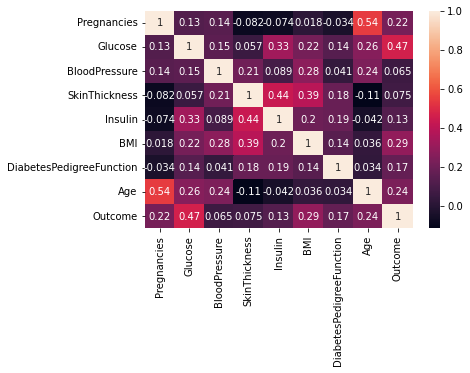

In [13]:
sns.heatmap(data.corr(), annot = True)
plt.show()

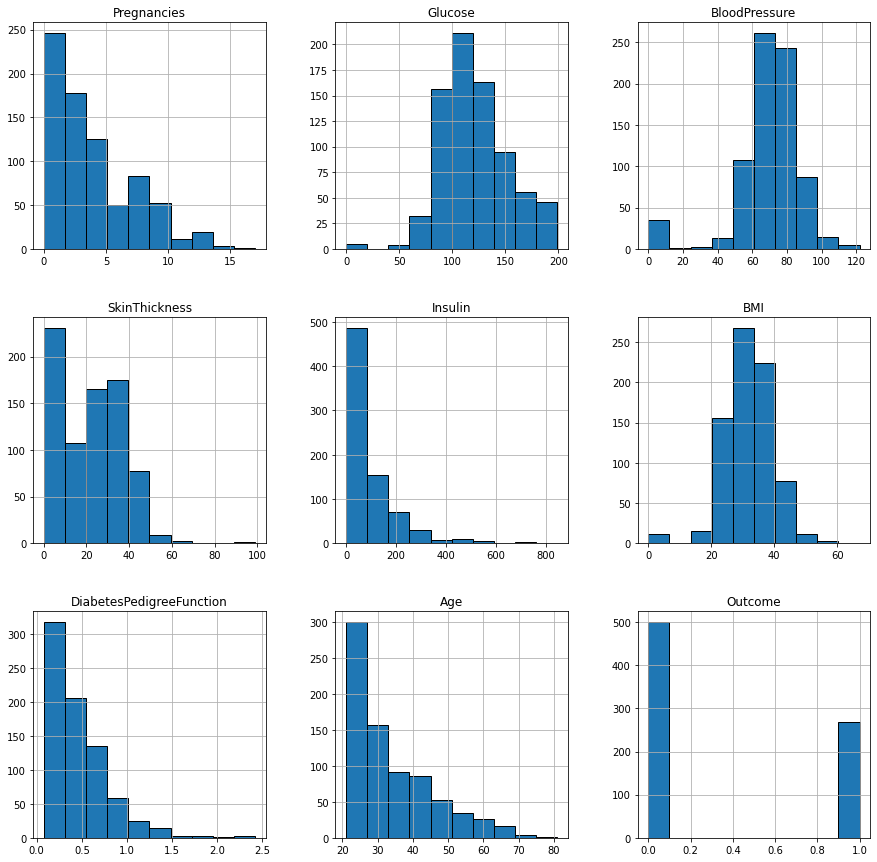

In [42]:
data.hist(edgecolor = "black",figsize=(15,15));

In [45]:
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols:
    data[col].replace(0,np.NaN,inplace=True)
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [48]:
for col in data.columns:
    data.loc[(data["Outcome"]==0) & (data[col].isnull()),col] = data[data["Outcome"]==0][col].median()
    data.loc[(data["Outcome"]==1) & (data[col].isnull()),col] = data[data["Outcome"]==1][col].median()

data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Finding and replacing Outliers

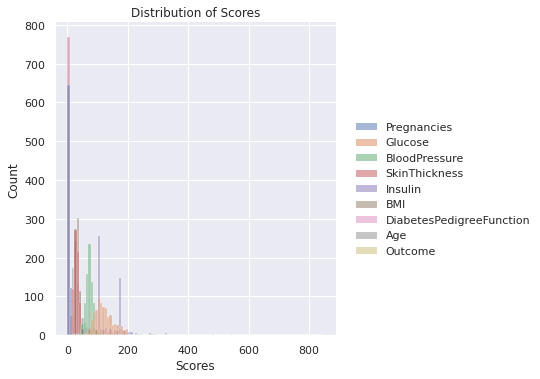

In [53]:
sns.set_theme()
sns.displot(data=data).set(title="Distribution of Scores", xlabel="Scores")

count    768.000000
mean     121.677083
std       30.464161
min       44.000000
25%       99.750000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

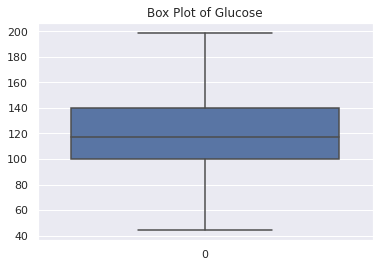

In [70]:
sns.boxplot(data=data[cols[0]]).set(title=f"Box Plot of {cols[0]}")
data[cols[0]].describe()

count    768.000000
mean      72.389323
std       12.106039
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

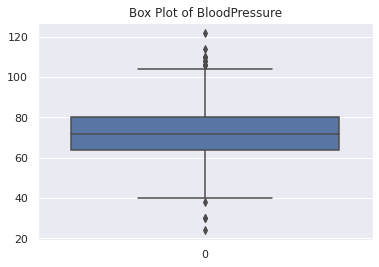

In [69]:
sns.boxplot(data=data[cols[1]]).set(title=f"Box Plot of {cols[1]}")
data[cols[1]].describe()

count    768.000000
mean      29.089844
std        8.890820
min        7.000000
25%       25.000000
50%       28.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

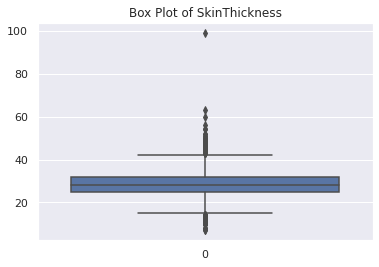

In [68]:
sns.boxplot(data=data[cols[2]]).set(title=f"Box Plot of {cols[2]}")
data[cols[2]].describe()

count    768.000000
mean     141.753906
std       89.100847
min       14.000000
25%      102.500000
50%      102.500000
75%      169.500000
max      846.000000
Name: Insulin, dtype: float64

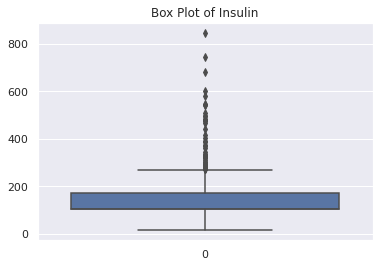

In [67]:
sns.boxplot(data=data[cols[3]]).set(title=f"Box Plot of {cols[3]}")
data[cols[3]].describe()

count    768.000000
mean      32.434635
std        6.880498
min       18.200000
25%       27.500000
50%       32.050000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

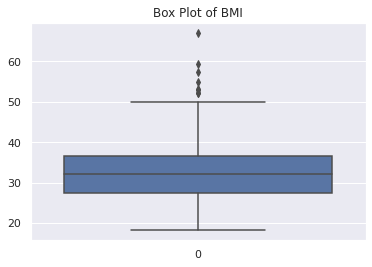

In [81]:
sns.boxplot(data=data[cols[4]]).set(title=f"Box Plot of {cols[4]}")
data[cols[4]].describe()

In [85]:
def outlier_thresholds(data, variable):
    quartile1 = data[variable].quantile(0.10)
    quartile3 = data[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit
def has_outliers(data, variable):
    low_limit, up_limit = outlier_thresholds(data, variable)
    if data[(data[variable] < low_limit) | (data[variable] > up_limit)].any(axis=None):
        print(variable)
print("OUTLIERS: ")
for col in data.columns:
    has_outliers(data, col)

OUTLIERS: 
SkinThickness
Insulin
DiabetesPedigreeFunction


In [86]:
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
replace_with_thresholds(data, data.columns)
for col in data.columns:
    has_outliers(data, col)
data.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.00000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.000
Glucose,768.0,121.677083,30.464161,44.000,80.00000,99.75000,117.0000,140.25000,167.0000,181.00000,196.00000,199.000
BloodPressure,768.0,72.389323,12.106039,24.000,52.00000,64.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.000
SkinThickness,768.0,29.055990,8.671056,7.000,14.35000,25.00000,28.0000,32.00000,40.0000,44.00000,51.33000,73.000
Insulin,768.0,138.839844,75.233052,14.000,50.00000,102.50000,102.5000,169.50000,210.0000,293.00000,424.50000,424.500
BMI,768.0,32.434635,6.880498,18.200,22.23500,27.50000,32.0500,36.60000,41.5000,44.39500,50.75900,67.100
DiabetesPedigreeFunction,768.0,0.470082,0.322171,0.078,0.14035,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,1.949
Age,768.0,33.240885,11.760232,21.000,21.00000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.000
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.000


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
scaler = StandardScaler().fit(X_test)
X_t_scaled = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_scaled, y_train)


LogisticRegression()

In [17]:
model.score(X_scaled, y_train)

0.7703583061889251

In [18]:
model.score(X_t_scaled, y_test)

0.7857142857142857

In [19]:
count_classes = pd.value_counts(data[target], sort=True)
count_classes

0    500
1    268
Name: Outcome, dtype: int64

In [20]:

positive = data[data[target]==1]
negative = data[data[target]==0]

In [21]:
negative.shape

(500, 9)

In [22]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE


In [23]:
nm = NearMiss()
sm = SMOTE()
X_under, y_under = nm.fit_resample(X,Y)
X_over, y_over = sm.fit_resample(X,Y)

In [24]:
print(X_over.isnull().values.any())
print(y_over.isnull().values.any())
columns =X_over.columns

for i in columns :
  for j in columns :
    if(i!=j):
      corr = X_over[i].corr(X_over[j])
      if corr>0.8:
        print(i,j,corr)
        print("\n")

False
False


In [25]:
print(y_under.isnull().values.any())
print(X_under.isnull().values.any())
columns =X_under.columns

for i in columns :
  for j in columns :
    if(i!=j):
      corr = X_under[i].corr(X_under[j])
      if corr>0.8:
        print(i,j,corr)
        print("\n")

False
False


In [26]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(
    X_under, y_under, test_size=0.2, random_state=42)

X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(
    X_over, y_over, test_size=0.2, random_state=42)

In [27]:

scaler = StandardScaler().fit(X_train_under)
X_under_scaled = scaler.transform(X_train_under)
model = LogisticRegression()
model.fit(X_under_scaled, y_train_under)

LogisticRegression()

In [28]:
X_under_stest = scaler.transform(X_test_under)

In [29]:
predictions = model.predict(X_under_stest)

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score
c_matrix = confusion_matrix(y_test_under,predictions)
print(c_matrix)

[[41 18]
 [11 38]]


In [31]:
print(f"Accuracy : {accuracy_score(y_test_under,predictions)}")
print(f"Precision: {precision_score(y_test_under,predictions)}")
print(f"Recall Score : {recall_score(y_test_under,predictions)}")
print(f"F1 Score : {f1_score(y_test_under,predictions)}")

Accuracy : 0.7314814814814815
Precision: 0.6785714285714286
Recall Score : 0.7755102040816326
F1 Score : 0.7238095238095238


In [32]:
model.score(X_under_stest, y_test_under)

0.7314814814814815

In [33]:
model.score(X_under_scaled, y_train_under)

0.7546728971962616

In [34]:
scaler = StandardScaler().fit(X_train_under)
X_over_scaled = scaler.transform(X_train_over)
model = LogisticRegression()
model.fit(X_over_scaled, y_train_over)

LogisticRegression()

In [35]:
X_over_stest = scaler.transform(X_test_over)

In [36]:
predictions_over = model.predict(X_over_stest)

In [37]:
print(f"Accuracy : {accuracy_score(y_test_over,predictions_over)}")
print(f"Precision: {precision_score(y_test_over,predictions_over)}")
print(f"Recall Score : {recall_score(y_test_over,predictions_over)}")
print(f"F1 Score : {f1_score(y_test_over,predictions_over)}")

Accuracy : 0.765
Precision: 0.7596153846153846
Recall Score : 0.7821782178217822
F1 Score : 0.7707317073170732


In [38]:
model.score(X_over_stest, y_test_over)

0.765

In [39]:
model.score(X_over_scaled, y_train_over)

0.7675